< 수행평가 >
1. 전체 평점의 평균 구하기 : 3.501556983616962

#------------------------------------------------------------#

2. userId 별 평균 평점 구하기. userId 오름차순
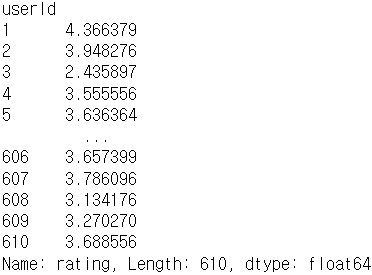

#------------------------------------------------------------#

3. 각 영화별 평균 평점을 구하기. movieId 오름차순
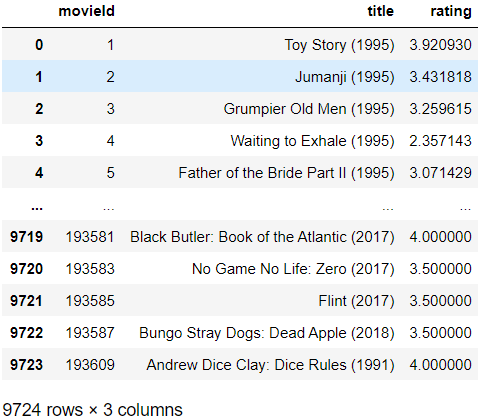

#------------------------------------------------------------#

4. 평균 평점이 가장 높은 영화의 제목을 구하기. 단 동률 있다면 모두 출력, title 오름차순
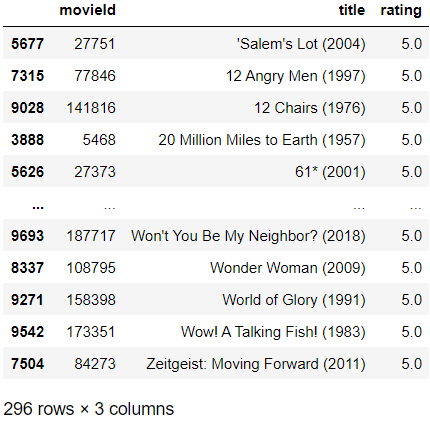

#------------------------------------------------------------#

5. Comedy영화 중 가장 평점이 낮은 영화의 제목을 구하기. 단 동률 있다면 모두 출력, title 오름차순
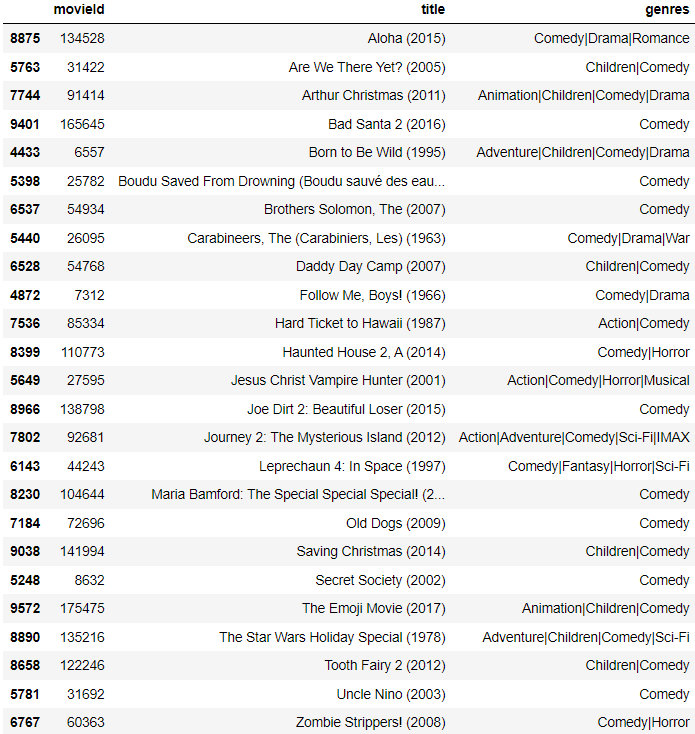

#------------------------------------------------------------#

6. 2015년도에 평가된 모든 Romance 영화의 평균 평점을 구하기 : 3.396375098502758

#------------------------------------------------------------#

7. 사용자 평점이 가장 좋은 영화장르를 구하기. 단 동률 있다면 모두 출력, genres 오름차순

rating       3.781682
genres    Documentary

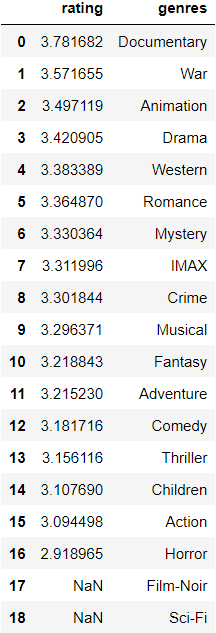

In [104]:
import numpy as np
import pandas as pd

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

# df_r.head(); df_m.head() # CSV 잘 가져왔는지 확인

df_r.info(); df_m.info() # Data 정보 확인

display(df_r.describe()); display(df_m.describe()) # Describe

# display(df_r.isnull().sum(axis=0)) # NaN 개수 재확인
# display(df_m.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [3]:
# 기술통계
print(np.mean(df_r['rating']))

print(np.median(df_r['rating'])) # 3.5. rating 컬럼의 중위값

print(pd.Series(df_r['rating']).mode()) # 4.0 rating 컬럼의 최빈값

rating = df_r['rating'][:10]
deviation = rating - np.mean(df_r['rating']) # 편차
print(deviation)

deviation_a = df_r['rating'] - np.mean(df_r['rating'])

print(np.mean(deviation_a ** 2)) # 분산, 편차의 제곱의 평균

print(np.var(deviation_a)) # Numpy의 함수. 분산

print(deviation_a.var()) # Pandas(DataFrame)의 메서드. 불편분산

print(deviation_a.var(ddof=0)) # 표본분산

# variance = np.mean(deviation_a ** 2)
# variance = np.var(deviation_a)
variance = deviation_a.var(ddof=0)

print(np.sqrt(np.var(variance))) # Numpy의 함수. 표준편차. 분산에 루트를 씌워서 제곱근을 구하라

print(np.std(variance)) # Numpy의 함수. 표준편차. Series의 표준편차를 구하라

print(df_r['rating'].max() - df_r['rating'].min()) # 범위(range)

#---------------------------------------------------------------

Q1 = np.percentile(df_r['rating'], 25) # Numpy의 함수. 1사분위(Q1, 25%)

Q2 = np.percentile(df_r['rating'], 50) # 2사분위(Q2, 50%) = 중위값(median)

Q3 = np.percentile(df_r['rating'], 75) # 3사분위(Q3, 75%)

IQR = Q3 - Q1

print(IQR) # 사분위 범위(IQR)

#---------------------------------------------------------------

ratings = df_r['rating'].values

freq, tmp = np.histogram(ratings, bins=5, range=(0, 5))

freq_class = [str(i) + '~' + str(i+1) for i in range(0, 5, 1)] # 도수분포표

freq_dist_df = pd.DataFrame({'Frequency':freq}, index=freq_class)

class_mark = [(i + (i+1)) / 2 for i in range(0,5,1)] # class mark(계급값)
freq_dist_df['class_mark'] = class_mark

# relative frequensy(상대도수)
rel_freq = freq / freq.sum()
freq_dist_df['rel_freq'] = rel_freq

# cumulative relative frequency(누적 상대도수)
freq_dist_df['cum_rel_freq'] = np.cumsum(rel_freq) # Numpy의 함수. 누적 상대도수

display(freq_dist_df)

print(df_r['rating'].value_counts())

3.501556983616962
3.5
0    4.0
Name: rating, dtype: float64
0    0.498443
1    0.498443
2    0.498443
3    1.498443
4    1.498443
5   -0.501557
6    1.498443
7    0.498443
8    1.498443
9    1.498443
Name: rating, dtype: float64
1.0868564357327866
1.086856435732806
1.0868672142961593
1.086856435732806
0.0
0.0
4.5
1.0


,Frequency,class_mark,rel_freq,cum_rel_freq
0~1,1370,0.5,0.013586,0.013586
1~2,4602,1.5,0.045638,0.059225
2~3,13101,2.5,0.129924,0.189149
3~4,33183,3.5,0.329079,0.518228
4~5,48580,4.5,0.481772,1.000000


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [4]:
# ML 수행평가 1. 전체 평점의 평균 구하기

print(df_r['rating'].mean()) # 3.501556983616962

3.501556983616962


In [5]:
# ML 수행평가 2. userId 별 평균 평점 구하기. userId 오름차순

grouped1 = df_r.groupby(['userId']).mean()

print(grouped1['rating'])

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64


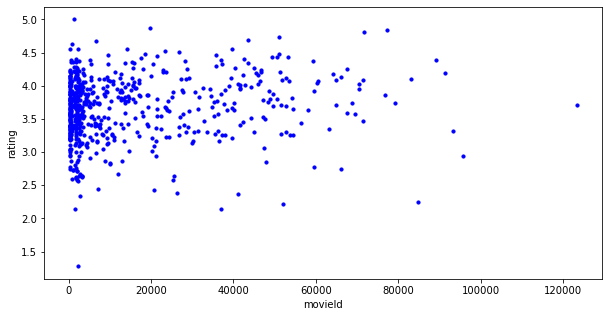

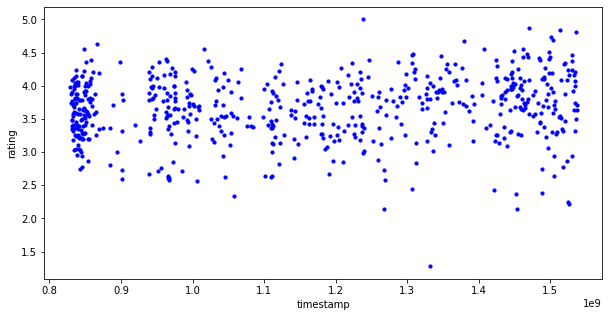

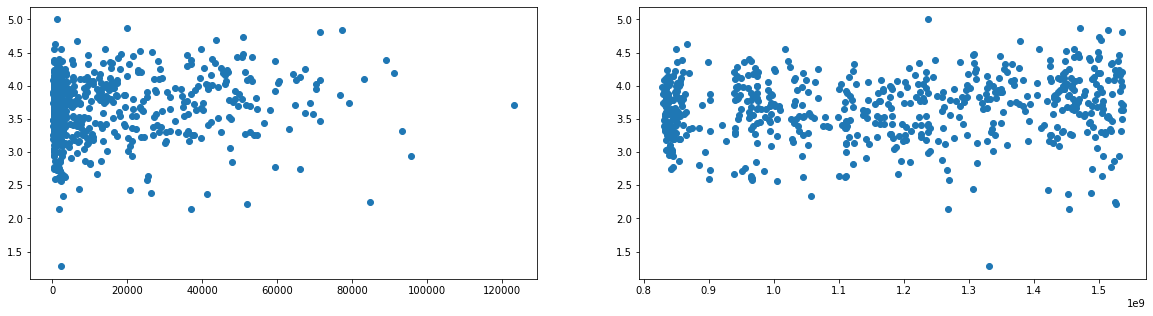

In [6]:
# ML 수행평가 2. userId 별 평균 평점 구하기. userId 오름차순 -> 시각화 2

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

grouped1.plot(kind='scatter', x= 'movieId', y= 'rating',
        color='b', s=10, figsize=(10,5))

grouped1.plot(kind='scatter', x= 'timestamp', y= 'rating',
        color='b', s=10, figsize=(10,5))

#---------------------------------------------------------------

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(grouped1['movieId'], grouped1['rating'])
ax2.scatter(grouped1['timestamp'], grouped1['rating'])

plt.show()

In [7]:
# ML 수행평가 3. 각 영화별 평균 평점을 구하기. movieId 오름차순

df1 = df_r.drop(df_r[['userId', 'timestamp']], axis=1, inplace=False) # 불필요한 컬럼들 삭제
df2 = df_m.drop(df_m[['genres']], axis=1, inplace=False)

# display(df1.head()) # 불필요한 컬럼들 지워졌는지 확인
# display(df2.head())

# print(df1['movieId'].value_counts()) # 그룹핑 전에 movieId 컬럼의 unique value의 개수와 df_m[movieId] 개수를 비교

grouped2 = df1.groupby(['movieId']).mean() # movieId 컬럼에 대해 그룹핑
# display(grouped2.head())

# print(grouped2.count()) # 그룹핑된 data의 유효한 값 개수 확인

result_df1 = pd.merge(grouped2, df2, on='movieId', how='inner') # DataFrame 결합
# display(result_df1)

r1 = result_df1.sort_values(by='movieId', ascending=True) # movieId 컬럼을 오름차순으로 정렬

r2 = pd.DataFrame(r1, columns=['movieId', 'title', 'rating']) # 컬럼들의 순서를 조정

display(r2)

,movieId,title,rating
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),4.000000
9720,193583,No Game No Life: Zero (2017),3.500000
9721,193585,Flint (2017),3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000


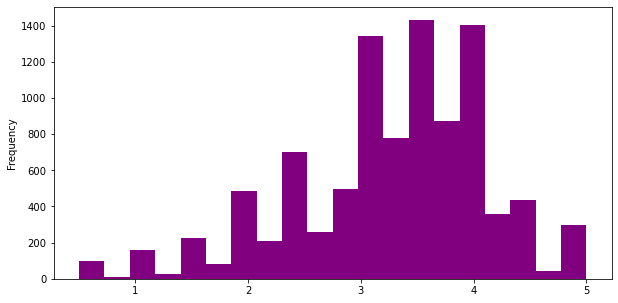

,movieId,userId,rating,timestamp,title,genres
0,1,306.530233,3.920930,1.129835e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,329.554545,3.431818,1.135805e+09,Jumanji (1995),Adventure|Children|Fantasy
2,3,283.596154,3.259615,1.005110e+09,Grumpier Old Men (1995),Comedy|Romance
3,4,219.857143,2.357143,8.985789e+08,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,299.571429,3.071429,9.926643e+08,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9719,193581,184.000000,4.000000,1.537109e+09,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,184.000000,3.500000,1.537110e+09,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,184.000000,3.500000,1.537110e+09,Flint (2017),Drama
9722,193587,184.000000,3.500000,1.537110e+09,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


,movieId,userId,rating,timestamp
movieId,1.000000,-0.092233,0.027841,0.785555
userId,-0.092233,1.000000,-0.190391,0.020749
rating,0.027841,-0.190391,1.000000,0.017549
timestamp,0.785555,0.020749,0.017549,1.000000


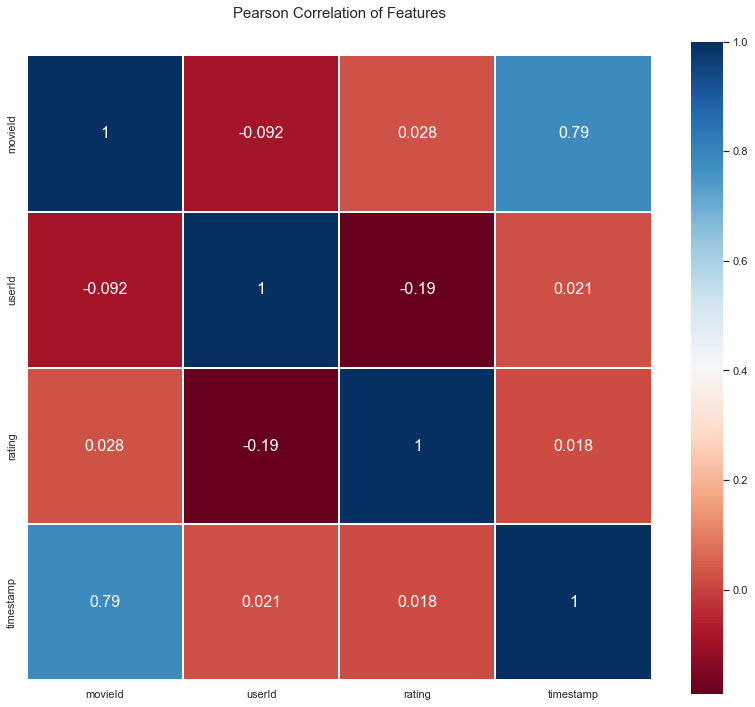

In [8]:
# ML 수행평가 3. 각 영화별 평균 평점을 구하기. movieId 오름차순 -> 시각화

r2['rating'].plot(kind='hist', bins=20, color='purple', figsize=(10,5))

plt.show()

#---------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

new_group = df_r.groupby(['movieId']).mean()
result_df1 = pd.merge(new_group, df_m, on='movieId', how='inner')

display(result_df1)
display(result_df1.corr()) # Feature 간의 상관관계

heatmap_data = result_df1[['movieId', 'userId', 'rating', 'timestamp']] # 피어슨 상관계수

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del heatmap_data

In [9]:
# ML 수행평가 4. 평균 평점이 가장 높은 영화의 제목을 구하기. 단 동률 있다면 모두 출력, title 오름차순

# r3 = r2.set_index('movieId', inplace=False) # movieId 컬럼을 index(행)로 설정

r2.describe() # = r3['rating'].max(). max 값 확인

# r3 = r2.loc[r2['rating'] == 5.000000]
r3 = r2.loc[r2['rating'] == r2['rating'].max()] # Boolean Indexing

r4 = r3.sort_values(by='title', ascending=True) # movieId 컬럼을 오름차순으로 정렬

display(r4)

,movieId,title,rating
5677,27751,'Salem's Lot (2004),5.0
7315,77846,12 Angry Men (1997),5.0
9028,141816,12 Chairs (1976),5.0
3888,5468,20 Million Miles to Earth (1957),5.0
5626,27373,61* (2001),5.0
...,...,...,...
9693,187717,Won't You Be My Neighbor? (2018),5.0
8337,108795,Wonder Woman (2009),5.0
9271,158398,World of Glory (1991),5.0
9542,173351,Wow! A Talking Fish! (1983),5.0


In [10]:
# ML 수행평가 5. Comedy영화 중 가장 평점이 낮은 영화의 제목을 구하기. 단 동률 있다면 모두 출력, title 오름차순

result_df2 = pd.merge(grouped2, df_m, on='movieId', how='inner') # DataFrame 결합

r5 = pd.DataFrame(result_df2, columns=['movieId', 'title', 'genres', 'rating'])

# r6 = r5.loc[(r5['rating'] == r5['rating'].min()) & (r5['genres'].isin(['Comedy']))]
# r6 = r5.loc[(r5['rating'] == r5['rating'].min()) & ((r5['genres'].isin(['Comedy'])) | (r5['genres'].isin(['|Comedy|'])) | (r5['genres'].isin(['|Comedy'])) | (r5['genres'].isin(['Comedy|'])))]

r6 = r5.loc[(r5['rating'] == r5['rating'].min()) & (r5['genres'].str.contains('Comedy'))] # Boolean Indexing

r7 = r6.sort_values(by='title', ascending=True) # movieId 컬럼을 오름차순으로 정렬
r8 = r7.drop(r7[['rating']], axis=1, inplace=False)

# print(r8.count())

display(r8)

,movieId,title,genres
8875,134528,Aloha (2015),Comedy|Drama|Romance
5763,31422,Are We There Yet? (2005),Children|Comedy
7744,91414,Arthur Christmas (2011),Animation|Children|Comedy|Drama
9401,165645,Bad Santa 2 (2016),Comedy
4433,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama
5398,25782,Boudu Saved From Drowning (Boudu sauvé des eau...,Comedy
6537,54934,"Brothers Solomon, The (2007)",Comedy
5440,26095,"Carabineers, The (Carabiniers, Les) (1963)",Comedy|Drama|War
6528,54768,Daddy Day Camp (2007),Children|Comedy
4872,7312,"Follow Me, Boys! (1966)",Comedy|Drama


In [11]:
# ML 수행평가 6. 2015년도에 평가된 모든 Romance 영화의 평균 평점을 구하기

import numpy as np
import pandas as pd
import time
from datetime import datetime

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

df2 = pd.merge(df_m, df_r, on="movieId", how="inner") # 그룹핑 안 하고 Inner Join

result = df2.loc[df2["genres"].str.contains("Romance")]

start = time.mktime(time.strptime("2015-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
end = time.mktime(time.strptime("2016-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))

print(result.loc[(result["timestamp"] >= start) & (result["timestamp"] < end),"rating"].mean()) # 3.396375098502758. 정답!

#---------------------------------------------------------------

# r9 = r5.loc[(r5['genres'].str.contains('Romance')) & (r5['title'].str.contains('(2015)'))] * title 컬럼을 사용하면 timestamp에 따른 값 일부 유실!
# print(r9['rating'].mean()) # 3.058333333333333. 오답!

#---------------------------------------------------------------

# df = df_r.groupby(['movieId']).mean() # movieId 컬럼에 대해 그룹핑 * 그룹핑 때문에 데이터 유실?

# result_df = pd.merge(df, df_m, on='movieId', how='inner') # Inner Join

# start = time.mktime(time.strptime("2015-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
# end = time.mktime(time.strptime("2016-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))

# result = result_df.loc[result_df["genres"].str.contains("Romance")]

# print(result.loc[(result['timestamp'] >= start) & (result['timestamp'] < end), 'rating'].mean()) # 3.3627482110979994. 오답!

#---------------------------------------------------------------

# df1 = df_r.groupby(['movieId']).mean() # movieId 컬럼에 대해 그룹핑 * 그룹핑 때문에 데이터 유실?

# df_rm = pd.merge(df1, df_m, on='movieId', how='inner') # Inner Join

# result = pd.DataFrame(df_rm, columns=['movieId', 'title', 'genres', 'rating', 'timestamp'])

# r1 = result.loc[(result['genres'].str.contains('Romance'))]

# start = time.mktime(time.strptime("2015-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
# end = time.mktime(time.strptime("2016-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))

# print(r1.loc[(r1['timestamp'] >= start) & (r1['timestamp'] < end), 'rating'].mean()) # 3.3627482110979994. 오답!

3.396375098502758


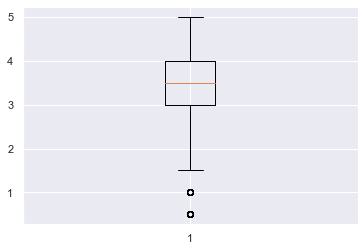

count    1269.000000
mean        3.396375
std         1.077671
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [12]:
# ML 수행평가 6. 2015년도에 평가된 모든 Romance 영화의 평균 평점을 구하기 -> 시각화

import numpy as np
import pandas as pd
import time
from datetime import datetime

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

df2 = pd.merge(df_m, df_r, on="movieId", how="inner") # 그룹핑 안 하고 Inner Join

result = df2.loc[df2["genres"].str.contains("Romance")]

start = time.mktime(time.strptime("2015-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
end = time.mktime(time.strptime("2016-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))

b_plot = result.loc[(result["timestamp"] >= start) & (result["timestamp"] < end),"rating"] # 2015년도에 평가된 모든 Romance 영화의 평점

plt.boxplot(x=[b_plot])

plt.show()

b_plot.describe()

In [13]:
# ML 수행평가 7. 사용자 평점이 가장 좋은 영화장르를 구하기. 단 동률 있다면 모두 출력, genres 오름차순 Ver. 1

import numpy as np
import pandas as pd

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

df_r_n = df_r.groupby(['movieId']).mean()

df1 = pd.merge(df_r_n, df_m, on="movieId", how="inner")

df2 = df1.loc[(df1['rating'] == df1['rating'].max()), ['movieId','title','genres','rating']]

all_genres = []
for x in df2.genres :
  all_genres.extend(x.split('|')) # |구분자로 나누어 all genres 안에 추가 
genres = pd.unique(all_genres) # 'numpy.ndarray' object로 결과 나옮

result = pd.DataFrame(genres, columns=['genres']) # DataFrame으로 만들고 컬럼명을 지정

display(result.sort_values(by='genres', ascending=True, ignore_index=True)) # genres 컬럼 값을 오름차순으로 정렬

,genres
0,(no genres listed)
1,Action
2,Adventure
3,Animation
4,Children
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


In [103]:
# ML 수행평가 7. 사용자 평점이 가장 좋은 영화장르를 구하기. 단 동률 있다면 모두 출력, genres 오름차순 Ver. 2

import numpy as np
import pandas as pd

df_r = pd.read_csv('./data/movielens/ratings.csv')
df_m = pd.read_csv('./data/movielens/movies.csv')

df = pd.merge(df_r_n, df_m, on="movieId", how="inner")

data = pd.DataFrame(df[df['genres'] != '(no genres listed)'], columns=['movieId', 'genres', 'rating'])

all_genres = []
for x in data.genres :
  all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

my_dict = {'genres': genres}
df1 = pd.DataFrame(my_dict)
df1 = df1.sort_values(by='genres', ascending=True, ignore_index=True)

Action = data['rating'][data['genres'].str.contains('Action')].mean()
Adventure = data['rating'][data['genres'].str.contains('Adventure')].mean()
Animation = data['rating'][data['genres'].str.contains('Animation')].mean()
Children = data['rating'][data['genres'].str.contains('Children')].mean()
Comedy = data['rating'][data['genres'].str.contains('Comedy')].mean()
Crime = data['rating'][data['genres'].str.contains('Crime')].mean()
Documentary = data['rating'][data['genres'].str.contains('Documentary')].mean()
Drama = data['rating'][data['genres'].str.contains('Drama')].mean()
Fantasy = data['rating'][data['genres'].str.contains('Fantasy')].mean()
Film_Noir = data['rating'][data['genres'].str.contains('Film_Noir')].mean()
Horror = data['rating'][data['genres'].str.contains('Horror')].mean()
IMAX = data['rating'][data['genres'].str.contains('IMAX')].mean()
Musical = data['rating'][data['genres'].str.contains('Musical')].mean()
Mystery = data['rating'][data['genres'].str.contains('Mystery')].mean()
Romance = data['rating'][data['genres'].str.contains('Romance')].mean()
Sci_Fi = data['rating'][data['genres'].str.contains('Sci_Fi')].mean()
Thriller = data['rating'][data['genres'].str.contains('Thriller')].mean()
War = data['rating'][data['genres'].str.contains('War')].mean()
Western = data['rating'][data['genres'].str.contains('Western')].mean()

# print(Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film_Noir, Horror, IMAX, Musical, Mystery, Romance, Sci_Fi, Thriller, War, Western)

rating = {'rating': [Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film_Noir, Horror, IMAX, Musical, Mystery, Romance, Sci_Fi, Thriller, War, Western]}

# df1['rating'] = rating
df2 = pd.DataFrame(rating)
df2['genres'] = df1
# display(df2)
# display(df2.sort_values(by='rating', ascending=False, ignore_index=True)) # 평점 평균 기준 내림차순
# display(df2.sort_values(by='genres', ascending=True, ignore_index=True)) # 장르 기준 오름차순
result1 = df2.sort_values(by='rating', ascending=False, ignore_index=True) # 평점 평균 기준 내림차순
result2 = df2.sort_values(by='genres', ascending=True, ignore_index=True) # 장르 기준 오름차순
display(result1)
display(result2)

# display(df2.loc[df2['rating'].max()]) # 평점 평균이 가장 높은 장르
# display(df2[df2['rating'].max()]) # 평점 평균이 가장 높은 장르

# display(result1['rating'][result1['rating'].max()])
# display(result1.loc[result1['rating'] == result1['rating'].max()])
display(result1.iloc[0]) # 평점 평균이 가장 높은 장르

,rating,genres
0,3.781682,Documentary
1,3.571655,War
2,3.497119,Animation
3,3.420905,Drama
4,3.383389,Western
5,3.364870,Romance
6,3.330364,Mystery
7,3.311996,IMAX
8,3.301844,Crime
9,3.296371,Musical


,rating,genres
0,3.094498,Action
1,3.215230,Adventure
2,3.497119,Animation
3,3.107690,Children
4,3.181716,Comedy
5,3.301844,Crime
6,3.781682,Documentary
7,3.420905,Drama
8,3.218843,Fantasy
9,NaN,Film-Noir


rating       3.781682
genres    Documentary
Name: 0, dtype: object